In [1]:
import cv2
from PIL import Image
import numpy as np
from IPython.display import display, Image as IPythonImage

In [2]:
from matplotlib import pyplot as plt

In [3]:
image_path = "./cyto_the_kid.jpg"

In [4]:
def showimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    display(Image.fromarray(img_rgb))

In [5]:
img0 = cv2.imread(image_path)

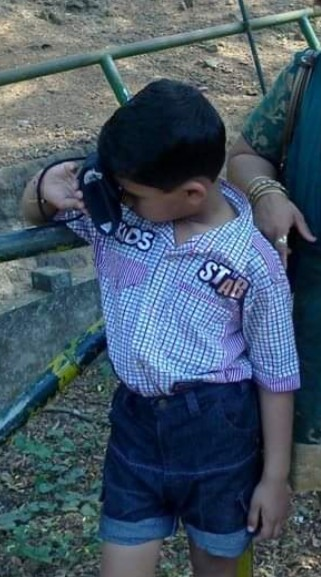

In [6]:
showimg(img0)

# Conversion to HSV

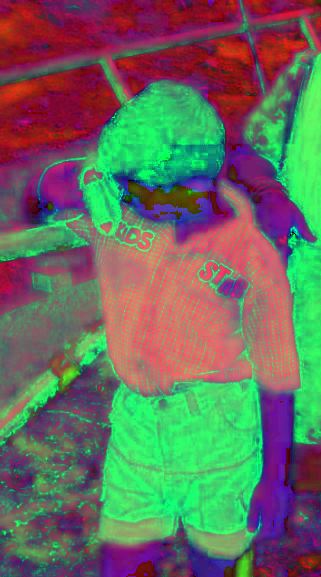

In [7]:
image_hsv = cv2.cvtColor(img0, cv2.COLOR_BGR2HSV)
showimg(image_hsv)

# Cropping

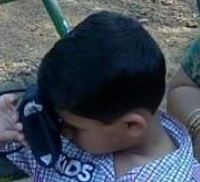

In [8]:
# The face in the image is at (60, 68) to (260, 250), the bottom-right corner

y_start, y_end = 68, 250
x_start, x_end = 60, 260

cropped_image = img0[y_start:y_end, x_start:x_end]
showimg(cropped_image)

# Blurring

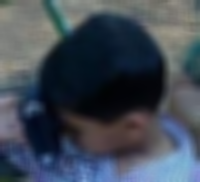

In [9]:
blurred_image = cv2.blur(cropped_image, (10, 10))
showimg(blurred_image)

# Contour Lines

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


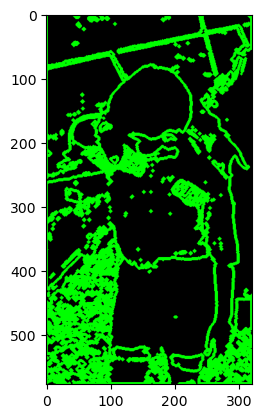

In [10]:
img_grayscale = cv2.cvtColor(img0, cv2.COLOR_BGR2GRAY)
threshold_value = 60
ret, thresh_img = cv2.threshold(img_grayscale, threshold_value, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh_img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
img_contours = np.zeros(img0.shape)
cv2.drawContours(img_contours, contours, -1, (0,255,0), 3)
plt.imshow(img_contours)

# Text on Image

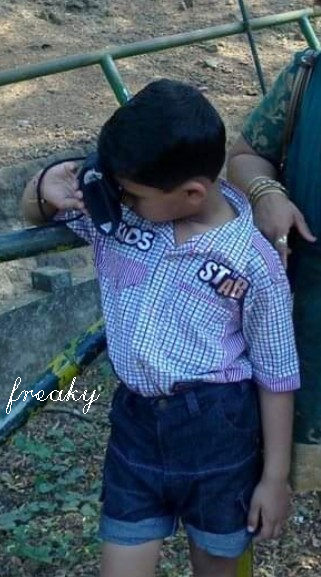

In [11]:
"""
bold_script = {
    'f': '\U0001D4EF',
    'r': '\U0001D4FB',
    'e': '\U0001D4EE',
    'a': '\U0001D4EA',
    'k': '\U0001D4F4',
    'y': '\U0001D502'
}
freaky = ''.join(bold_script[char] for char in "freaky")

"""
img1 = img0.copy()
#cv2.putText(img1, freaky, (10, 400), cv2.FONT_HERSHEY_PLAIN, 1.1, (255, 255, 255))
cv2.putText(img1, "freaky", (10, 400), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 1.1, (255, 255, 255))
showimg(img1)

In [28]:
def showpltimg(img):
    # cv2 images are in bgr by default and IPython assumes RGB for display
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    plt.figure(figsize = (10, 10))
    plt.imshow(img_rgb)
    plt.axis("off")
    #display(Image.fromarray(img_rgb))

In [29]:
img_srish = img1

In [30]:
"""
cropped_image = img_srish[:, 500:]
#showpltimg(cropped_image)
cv2.putText(cropped_image, "freaky", (500, 2355), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 4, (255, 255, 255), 4)
showpltimg(cropped_image)
"""

'\ncropped_image = img_srish[:, 500:]\n#showpltimg(cropped_image)\ncv2.putText(cropped_image, "freaky", (500, 2355), cv2.FONT_HERSHEY_SCRIPT_COMPLEX, 4, (255, 255, 255), 4)\nshowpltimg(cropped_image)\n'

In [31]:
rows, cols, _ = img_srish.shape


# Step 1: Rotate the image 90 degrees counterclockwise
# The rotation matrix for 90 degrees counterclockwise
rotation_matrix = cv2.getRotationMatrix2D((cols / 2, rows / 2), 90, 1)
rotated_image = cv2.warpAffine(img_srish, rotation_matrix, (cols, rows))

# Step 2: Zoom at the center by a factor of 2
# Create a zoom matrix
zoom_factor = 2
zoom_matrix = np.float32([[zoom_factor, 0, -cols * (zoom_factor - 1) / 2], 
                           [0, zoom_factor, -rows * (zoom_factor - 1) / 2]])

# Apply the zoom transformation
zoomed_image = cv2.warpAffine(rotated_image, zoom_matrix, (cols, rows))

# Step 3: Stretch the image in the vertical axis
# Create a stretch matrix
stretch_factor = 2  # Stretch by a factor of 2 in the vertical direction
stretch_matrix = np.float32([[1, 0, 0], 
                              [0, stretch_factor, 0]])

# Apply the stretch transformation
final_image = cv2.warpAffine(zoomed_image, stretch_matrix, (cols, int(rows * stretch_factor)))



(-0.5, 320.5, 1153.5, -0.5)

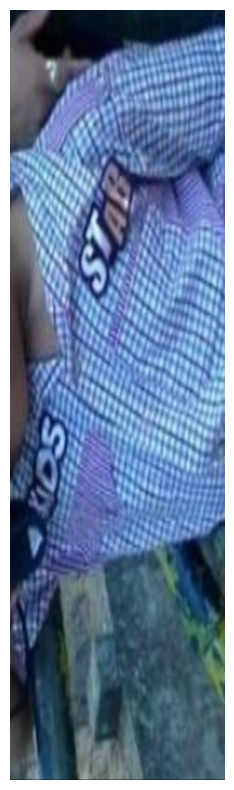

In [32]:
img_rgb = cv2.cvtColor(final_image, cv2.COLOR_BGR2RGB)
plt.figure(figsize=(10,10))
plt.imshow(img_rgb)
plt.axis("off")

In [33]:
# Step 1: Increase saturation
hsv = cv2.cvtColor(final_image, cv2.COLOR_BGR2HSV)
h, s, v = cv2.split(hsv)
s = cv2.add(s, 100)  # Increase saturation
hsv = cv2.merge((h, s, v))
saturated_image = cv2.cvtColor(hsv, cv2.COLOR_HSV2BGR)


# Step 2: Increase contrast
alpha = 2.0  # Contrast control (1.0-3.0)
beta = 0    # Brightness control (0-100)
contrasted_image = cv2.convertScaleAbs(saturated_image, alpha=alpha, beta=beta)


"""
# Step 5: Add a vignette effect (optional)
rows, cols = blurred_image.shape[:2]
kernel_x = cv2.getGaussianKernel(cols, 200)
kernel_y = cv2.getGaussianKernel(rows, 200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
vignette = np.zeros_like(blurred_image)
for i in range(3):  # Apply vignette to each channel
    vignette[:, :, i] = blurred_image[:, :, i] * mask
"""


'\n# Step 5: Add a vignette effect (optional)\nrows, cols = blurred_image.shape[:2]\nkernel_x = cv2.getGaussianKernel(cols, 200)\nkernel_y = cv2.getGaussianKernel(rows, 200)\nkernel = kernel_y * kernel_x.T\nmask = 255 * kernel / np.linalg.norm(kernel)\nvignette = np.zeros_like(blurred_image)\nfor i in range(3):  # Apply vignette to each channel\n    vignette[:, :, i] = blurred_image[:, :, i] * mask\n'

In [34]:
# Step 3: Add noise
noise = np.random.randint(0, 50, contrasted_image.shape, dtype='uint8')
noisy_image = cv2.add(contrasted_image, noise)

# Step 4: Apply a Gaussian blur
blurred_image = cv2.GaussianBlur(noisy_image, (5, 5), 0)

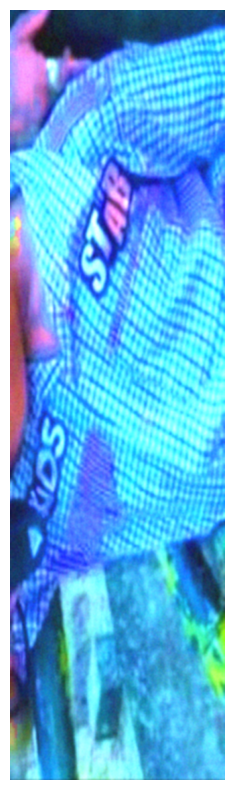

In [35]:
showpltimg(blurred_image)

In [36]:
rows, cols = blurred_image.shape[:2]
kernel_x = cv2.getGaussianKernel(cols, 200)
kernel_y = cv2.getGaussianKernel(rows, 200)
kernel = kernel_y * kernel_x.T
mask = 255 * kernel / np.linalg.norm(kernel)
vignette = np.zeros_like(blurred_image)
for i in range(3):  # Apply vignette to each channel
    vignette[:, :, i] = blurred_image[:, :, i] * mask

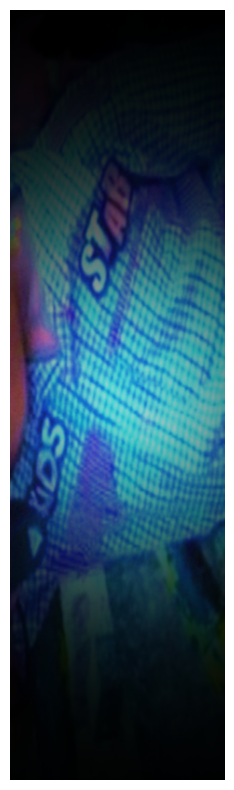

In [37]:
showpltimg(vignette)